In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
# import lightgbm as lgb
# import xgboost as xgb

from sklearn.dummy import DummyClassifier

In [147]:
dataset = pd.read_csv('csv/dataset1.csv')
dataset = dataset[dataset['Квалификация'] != 3]
dataset = dataset[dataset['Квалификация'] != 4]
dataset.drop('Учебный год', axis=1, inplace=True)
dataset = dataset[dataset['Форма обучения'] != 1]



data = dataset.iloc[:, :-1]
target = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Число ошибочно классифицированных образцов DummyClassifier: % d" % (y_test != y_pred).sum())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_name))

print()
print('Логик регрессион')
print('Вероятность моего отчисления за первый семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
print('Вероятность моего отчисления за второй семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
print('Вероятность моего отчисления за третий семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
print('Вероятность моего отчисления за четвертый семестр:',clf.predict(pd.read_csv('uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)
print()

In [148]:
lr = LogisticRegression(C=1000.0, max_iter=1000000)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

target_name = ['0 - не отчислен', 'Отчислен']
print(classification_report(y_test, y_pred, target_names=target_name))
confusion_matrix(y_test, y_pred)

auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

# print('Логик регрессион')
# print('Вероятность моего отчисления за первый семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
# print('Вероятность моего отчисления за второй семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
# print('Вероятность моего отчисления за третий семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
# print('Вероятность моего отчисления за четвертый семестр:',lr.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)


                 precision    recall  f1-score   support

0 - не отчислен       0.90      0.99      0.94      4722
       Отчислен       0.63      0.09      0.15       599

       accuracy                           0.89      5321
      macro avg       0.76      0.54      0.55      5321
   weighted avg       0.87      0.89      0.85      5321

AUC-ROC: 0.5393943315097378


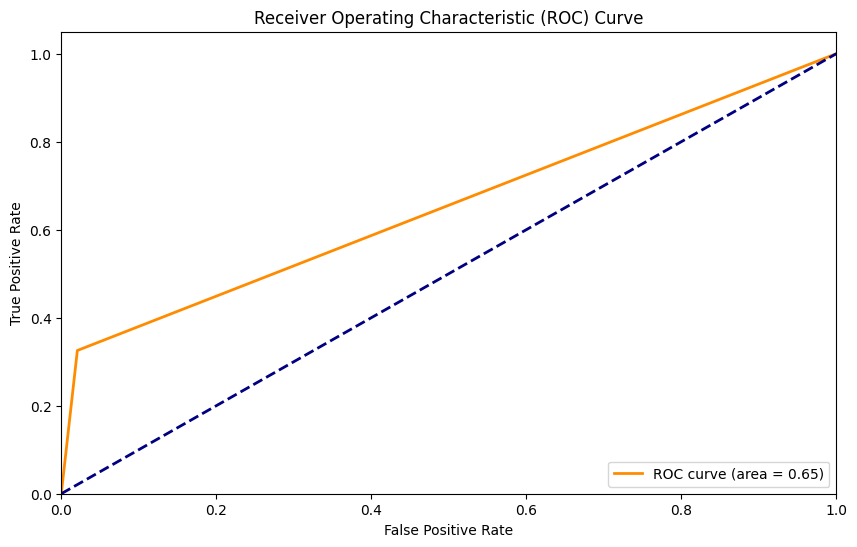

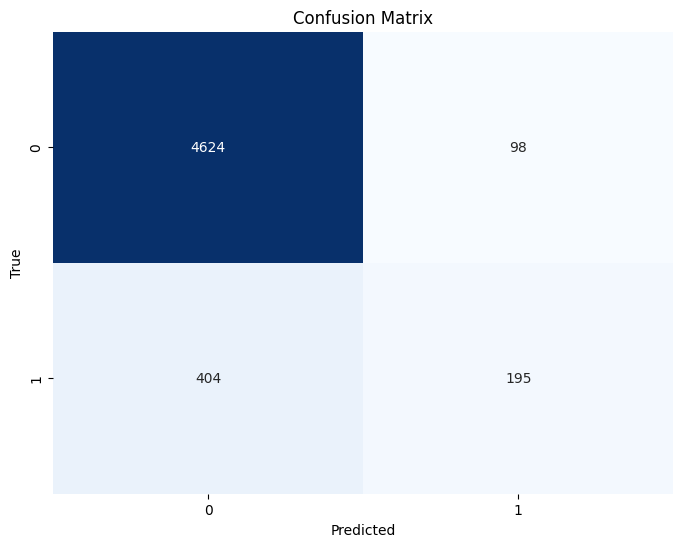

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)

# Создание тепловой карты для визуализации матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [150]:
# best = np.zeros([3])



# for i in range(1, 15):
#         for j in range(1, 3):
#             model = CatBoostClassifier(iterations=1000, devices='0:1', depth=i,        # Глубина деревьев
#                                     learning_rate=1/(10**j),  # Скорость обучения
#                                     loss_function='Logloss',  # Функция потерь для задачи классификации
#                                     logging_level='Silent')
#             model.fit(X_train_std, y_train)

#             y_pred = model.predict(X_test_std)

#             accuracy = accuracy_score(y_test, y_pred)
#             report = classification_report(y_test, y_pred)

#             info = np.array([f'Глубина {i}', f'Скорость обучения {1/(10**j)}', accuracy])
#             print(info)
#             best = np.vstack((best, info))

# max_row_index = np.argmax(best[:, 2])

# # Extract the row with the maximum value
# max_row = best[max_row_index, :]

# print("Row with the maximum value in column {}: {}".format(2, max_row))


In [155]:
model = CatBoostClassifier(iterations=1000, devices='0:1', depth=5,        # Глубина деревьев
                                    learning_rate=0.1,  # Скорость обучения
                                    loss_function='Logloss',  # Функция потерь для задачи классификации
                                    logging_level='Silent')
model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)

print(report)

confusion_matrix(y_test, y_pred)

auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')


0.905656831422665
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4722
           1       0.67      0.33      0.44       599

    accuracy                           0.91      5321
   macro avg       0.79      0.65      0.69      5321
weighted avg       0.89      0.91      0.89      5321

AUC-ROC: 0.6523943265600793


In [152]:
confusion_matrix(y_test, y_pred)


array([[4624,   98],
       [ 404,  195]], dtype=int64)

In [153]:
print('Вероятность моего отчисления за первый семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[:1,:])[:, 1] * 100)
print('Вероятность моего отчисления за второй семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[1:2,:])[:, 1] * 100)
print('Вероятность моего отчисления за третий семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[2:3,:])[:, 1] * 100)
print('Вероятность моего отчисления за четвертый семестр:',model.predict_proba(pd.read_csv('csv/uspevaemost_nakop_My.csv').iloc[3:4,:])[:, 1] * 100)

Вероятность моего отчисления за первый семестр: [0.12240446]
Вероятность моего отчисления за второй семестр: [0.01392328]
Вероятность моего отчисления за третий семестр: [0.04225587]
Вероятность моего отчисления за четвертый семестр: [0.00453318]


sum(y_pred == 1)

from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train_std, y_train)

# Make predictions
tree_predictions = tree_classifier.predict(X_test_std)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Decision Tree Accuracy: {tree_accuracy}")

report = classification_report(y_test,  tree_predictions)
print(report)
confusion_matrix(y_test, tree_predictions)

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_std, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test_std)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
report = classification_report(y_test, y_pred)
print(report)
confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f'AUC-ROC: {auc_roc}')

Random Forest Accuracy: 0.899454989663597
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4722
           1       0.67      0.33      0.44       599

    accuracy                           0.91      5321
   macro avg       0.79      0.65      0.69      5321
weighted avg       0.89      0.91      0.89      5321

AUC-ROC: 0.6523943265600793


from sklearn.svm import SVC

# Create and train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_std, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test_std)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
report = classification_report(y_test, svm_predictions)
print(report)
confusion_matrix(y_test, svm_predictions)

from sklearn.naive_bayes import GaussianNB


    

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_std, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test_std)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")
report = classification_report(y_test, nb_predictions)
print(report)
confusion_matrix(y_test, nb_predictions)

from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN classifier with k=5 (you can adjust k)
for i in range(1, 10):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_std, y_train)

    # Make predictions
    knn_predictions = knn_classifier.predict(X_test_std)

    # Evaluate the model
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    print(f"KNN Accuracy: {knn_accuracy}")
    report = classification_report(y_test, knn_predictions)
    print(report)
    confusion_matrix(y_test, knn_predictions)

Row with the maximum value in column 2: ['Глубина 10' 'Скорость обучения 0.01' '0.9127774864534173']

import numpy as np

# Create an initial NumPy array
arr = np.array([1, 2, 3])

# Append a single element


# Append multiple elements (as a list)
new_elements = [5, 6, 7]
arr = np.vstack((arr, new_elements))

print(arr)

train_data = lgb.Dataset(X_train_std, label=y_train)
test_data = lgb.Dataset(X_test_std, label=y_test, reference=train_data)

# Определяем параметры модели
params = {
    'objective': 'binary',  # для задачи бинарной классификации
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # метрика качества
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.9
}

# Обучаем модель
num_round = 1000  # количество итераций обучения
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Предсказываем на тестовом наборе данных
y_pred = bst.predict(X_test_std, num_iteration=bst.best_iteration)

# Оцениваем качество модели
y_pred_binary = np.round(y_pred)  # преобразуем вероятности в бинарные предсказания
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
confusion_matrix(y_test, y_pred_binary)

params = {
    'objective': 'binary:logistic',  # для задачи бинарной классификации
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'eval_metric': 'logloss'
}

# Создаем объект DMatrix для данных
train_data = xgb.DMatrix(X_train_std, label=y_train)
test_data = xgb.DMatrix(X_test_std, label=y_test)

# Обучаем модель с ранней остановкой (early stopping)
watchlist = [(test_data, 'eval'), (train_data, 'train')]
num_round = 1000  # большое количество итераций
bst = xgb.train(params, train_data, num_round, evals=watchlist, early_stopping_rounds=10)

# Предсказываем на тестовом наборе данных
y_pred = bst.predict(test_data)

# Оцениваем качество модели
y_pred_binary = np.round(y_pred)  # преобразуем вероятности в бинарные предсказания
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
confusion_matrix(y_test, y_pred_binary)

y_test[y_test == 1].shape

sum(y_pred == 1)

for column, coef in zip(data.columns, lr.coef_[0]):
    print(f'Важность признака {column} равна {coef}')
